# Exploring Hotel Booking Trends: 
## Feature Transformation for Improved Modeling - Assignment

## Problem Statement:
Have you ever wondered how many hotel bookings are canceled or what is the peak time for the hotel? This hotel booking dataset can help you explore these questions! This dataset comprehends bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

We have to apply feature transformation to all the data points such that the transformed data is ready for the modeling purpose.

## Data Description:
**hotel:** Hotel (H1 = Resort Hotel or H2 = City Hotel).<br>
**is_canceled:** Value indicating if the booking was canceled (1) or not (0).<br>
**lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.<br>
**arrival_date_year:** Year of arrival date.<br>
**arrival_date_month:** Month of arrival date.<br>
**arrival_date_week_number:** Week number of year for arrival date.<br>
**arrival_date_day_of_month:** Day of arrival date.<br>
**stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.<br>
**stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.<br>
**adults:** Number of adults.<br>
**children:** Number of children.<br>
**babies:** Number of babies.<br>
**meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).<br>
**country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format.<br>
**market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.<br>
**distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.<br>
**is_repeated_guest:** Value indicating if the booking name was from a repeated guest (1) or not (0).<br>
**previous_cancellations:** Number of previous bookings that were cancelled by the customer prior to the current booking.<br>
**previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking.<br>
**reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.<br>
**assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.<br>
**booking_changes:** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.<br>
**deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.<br>
**agent:** ID of the travel agency that made the booking.<br>
**company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.<br>
**days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer.<br>
**customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.<br>
**adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.<br>
**required_car_parking_spaces:** Number of car parking spaces required by the customer.<br>
**total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor).<br>
**reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.<br>
**reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when the booking was canceled or when the customer checked-out of the hotel.<br>

## Tasks/Activities List:
* Your code should contain the following activities/Analysis:
  Read the hotel dataset.
* Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.
* Analyze the categorical data.
* Transform the categorical data using the One hot encoder or Label encoder.
* Analyze the numerical data.
* Transform the numerical data using the Power transform.
* Finally scale the data.

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Summary Statistics for Numerical Variables](#3.1)**
   - **[3.2: Summary Statistics for Categorical Variables](#3.2)**
- **[4: EDA](#eda)**
   - **[4.1: Geographical Distribution of Guests for Non-Canceled Bookings](#4.1)**
   - **[4.2: ADR Distribution by Room Type and Hotel (Non-Canceled)](#4.2)**
   - **[4.3: Monthly Bookings Comparison Between Hotels](#4.3)**
   - **[4.4: Stay Durations between Resort and City Hotels](#4.4)**
- **[5: Data Preprocessing](#5)**
   - **[5.1 : Feature Selection and Engineering](#5.1)**
       - **[5.1.1: Remove Directly Related Features](#5.1.1)**
       - **[5.1.2: Drop Irrelevant Features](#5.1.2)**
       - **[5.1.3: Engineer and Drop High-Cardinality Features](#5.1.3)**
   - **[5.2: Handle Missing Values](#5.2)**
   - **[5.3: Handle Noisy Data](#5.3)**
   - **[5.4: Feature Scaling and Encoding](#5.4)**
       - **[5.4.1: Numerical columns scaling](#5.4.1)**
       - **[5.4.2: Categorical columns Encoding](#5.4.2)**
    - **[5.5: Check Imbalanced Data](#5.5)**

<a id="1"></a>
# 1: Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

plt.style.use('dark_background')
%matplotlib inline

<a id="2"></a>
# 2: Read Dataset

In [2]:
df = pd.read_csv('hotel.csv')
pd.set_option('display.max_columns', 32)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<a id="3"></a>
# 3: Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Inferences:**
* `Total Entries:` The dataset consists of `119,390 entries`.

* `Columns`: The dataset contains 32 columns, which represent various attributes related to hotel bookings.

* `Data Types:`<br>
   * A majority of the columns, 12 to be precise, are of the object data type (often representing strings or categorical data).
   * 16 columns are of the int64 data type, representing integer values.
   * 4 columns are of the float64 data type, which typically denotes decimal values.

In [4]:
# checking for null values 
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) /len(df) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


**inferences:**
* `Missing Values:`
* children has 4 missing values with `0.003350 %` misiing value percentage
* country has 488 missing values with `0.408744 %` misiing value percentage
* agent has 16,340 missing values with `13.686238 %` misiing value percentage
* The column company has a significant number of missing values, totaling 112,593, with `94.306893 %` misiing value percentage

**Note:**
Based on the data types and the feature explanations provided earlier, we identified that **16 columns** (hotel, is_canceled, arrival_date_year, arrival_date_month, meal, country, market_segment, distribution_channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, agent, company, customer_type, reservation_status) are **categorical** in terms of their semantics. These features must have string (**object**) data type to ensure proper analysis and interpretation in subsequent steps:

In [5]:
# Based on the given dataset description, list the columns that are categorical in terms of their semantics
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status'
]

# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
    if column in df.columns:
        df[column] = df[column].astype(str)

# Verify the changes in data types
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<a id="3.1"></a>
## 3.1: Summary Statistics for Numerical Variables

In [6]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


**inferences:**
* **lead_time:** The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.
* **arrival_date_week_number:** The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.
* **arrival_date_day_of_month:** The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.
* **stays_in_weekend_nights:** On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.
* **stays_in_week_nights:** On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.
* **adults:** The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.
* **children:** On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.
* **babies:** The average number of babies per booking is very low, approximately 0.008, with a maximum of 10 babies in some bookings.
* **previous_cancellations:** On average, guests have canceled about 0.09 times in the past, with some guests having as many as 26 previous cancellations.
* **previous_bookings_not_canceled:** On average, guests have not canceled about 0.14 bookings in the past, with some guests having as many as 72 previous bookings that they didn't cancel.
* **booking_changes:** Bookings are changed on average about 0.22 times, with some bookings being changed up to 21 times.
* **days_in_waiting_list:** The average time a booking spends on the waiting list is approximately 2.32 days, with some bookings waiting for as long as 391 days.
* **adr:** The Average Daily Rate is about 101.83, with rates ranging from -6.38 (which might indicate errors or special cases) to 5400.
* **required_car_parking_spaces:** On average, guests require about 0.06 parking spaces, with some bookings requiring up to 8 spaces.
* **total_of_special_requests:** On average, guests make about 0.57 special requests, with some making up to 5 requests.

**Noisy Data Features:**
Based on the descriptions and the inferences provided earlier, the following features seem to contain noisy data:

* **adr:** The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential errors or special cases.
* **adults:** The minimum value is 0, which implies bookings without any adults. This could be a data entry error unless there are legitimate cases where only children or babies book a room.
* **children and babies:** Both have a maximum value of 10, which seems unusually high for a single booking. This could be a potential outlier or data entry error, but it would require more context or domain knowledge to say definitively.<br><br>
`Further investigation, possibly involving domain expertise or additional context, would be necessary to determine the true nature of these data points.`

<a id="3.2"></a>
## 3.2: Summary Statistics for Categorical Variables

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


**inferences**:
* **hotel:** There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.
* **is_canceled:** Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.
* **arrival_date_year:** There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.
* **arrival_date_month:** There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.
* **meal:** Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.
* **country:** 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.
* **market_segment:** Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.
* **distribution_channel:** Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.
* **is_repeated_guest:** Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.
* **reserved_room_type and assigned_room_type:** Various room types are present, with some types being more frequent than others.
* **deposit_type:** Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.
* **agent:** There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.
* **company:** There are 353 unique companies, but 'nan' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.
* **customer_type:** Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times.
* **reservation_status:** Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.
* **reservation_status_date:** There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times.


<a id="4"></a>
# 4: EDA

<a id="4.1"></a>
### 4.1: Geographical Distribution of Guests for Non-Canceled Bookings

In [8]:
country_wise_guests = df[df['is_canceled'] == '0']['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


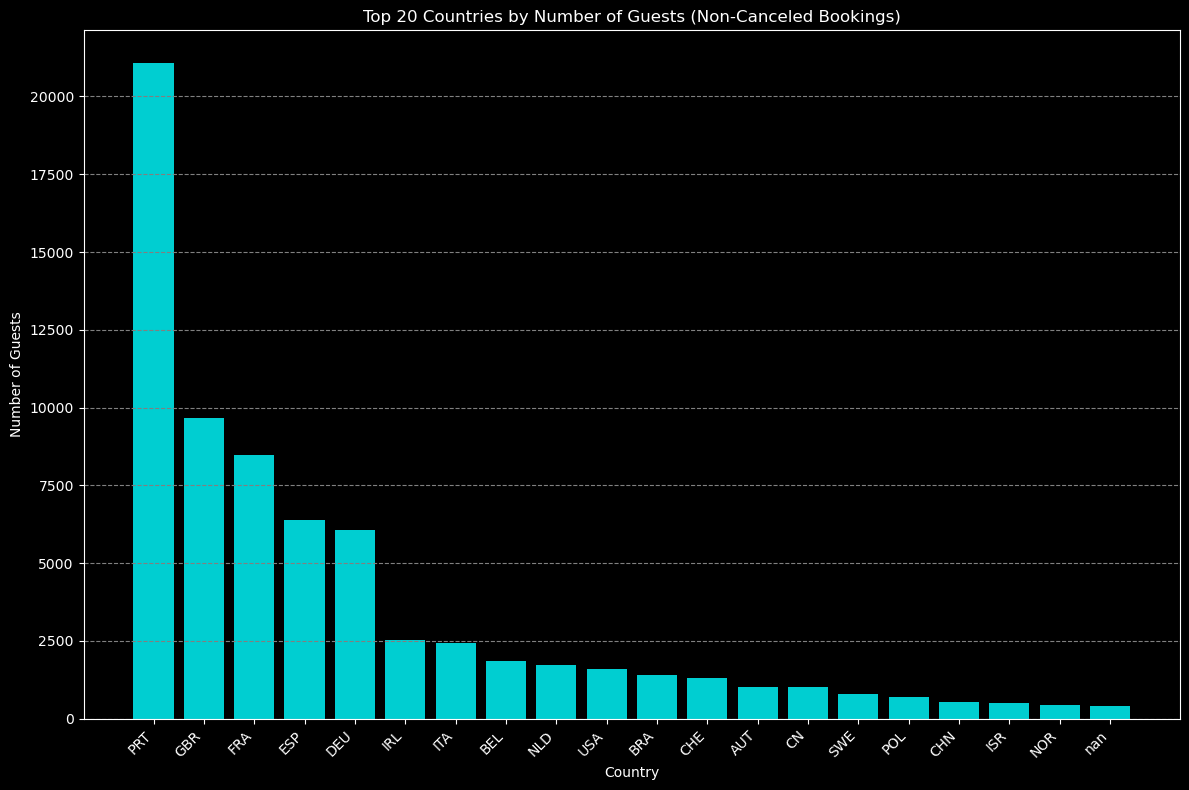

In [9]:
# Create a Plotly choropleth map
# data = dict(
#         type = 'choropleth',
#         colorscale = 'Viridis',
#         reversescale = True,
#         locations = country_wise_guests['country'],
#         z = country_wise_guests['No of guests'],
#         text = country_wise_guests['country'],
#         colorbar = {'title' : 'Number of Guests'}
#       ) 

# layout = dict(
#     title = 'Number of Guests per Country (Non-Canceled Bookings)',
#     geo = dict(
#         showframe = False,
#         projection = {'type':'mercator'}
#     )
# )

# choromap = go.Figure(data = [data],layout = layout)

# # Plot the map
# iplot(choromap)


# Sort the DataFrame by the number of guests in descending order
country_wise_guests_sorted = country_wise_guests.sort_values(by='No of guests', ascending=False)

# Plotting only top N countries
N = 20  # Adjust this value as needed
top_countries = country_wise_guests_sorted.head(N)

plt.figure(figsize=(12, 8))
plt.bar(top_countries['country'], top_countries['No of guests'], color='darkturquoise')
plt.title('Top {} Countries by Number of Guests (Non-Canceled Bookings)'.format(N))
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', color='gray', linestyle='--')  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

**inference:**<br>
People from all over the world are staying in these hotels, specially more people from portugal are visiting these hotels


<a id="4.2"></a>
### 4.2: ADR Distribution by Room Type and Hotel (Non-Canceled)

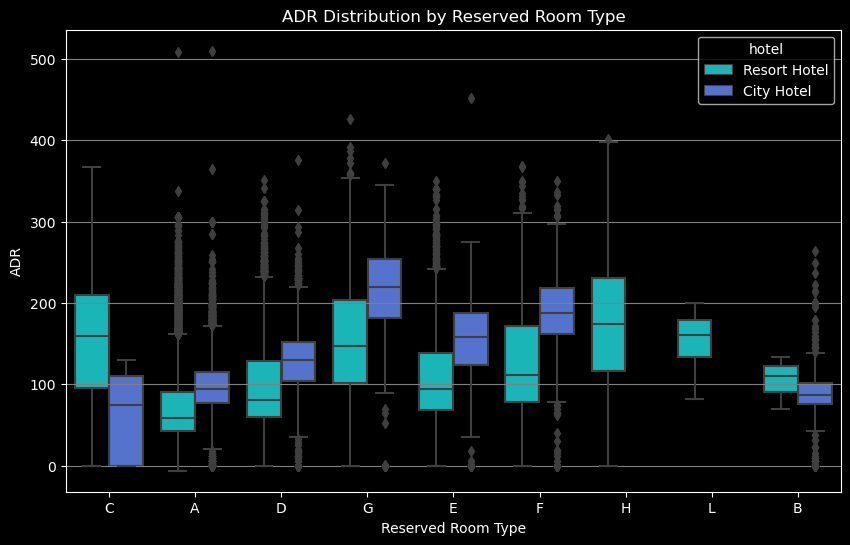

In [10]:
data = df[df['is_canceled'] == '0']

plt.figure(figsize=(10, 6))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data, palette=['darkturquoise', 'royalblue'])
plt.title('ADR Distribution by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')
plt.grid(axis='y', color='gray')  # Add grid lines
plt.show()

#### or using plotly #####


# px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

**inference:**<br>
The figure shows that the average price per room depends on its type and the standard deviation.

<a id="4.3"></a>
### 4.3: Monthly Bookings Comparison Between Hotels

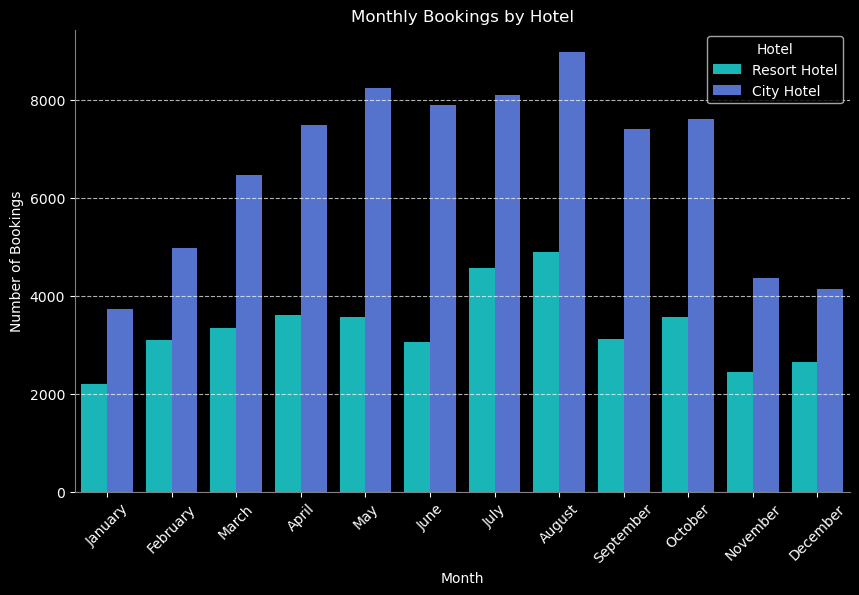

In [11]:
# Convert 'arrival_date_month' to categorical data with proper ordering
df1 = df.copy()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'], categories=months_order, ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='arrival_date_month', hue='hotel', palette=['darkturquoise', 'royalblue'])
plt.title('Monthly Bookings by Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_color('none')  # Remove top border
plt.gca().spines['right'].set_color('none')  # Remove right border
plt.gca().spines['left'].set_color('gray')  # Set left border color to gray
plt.gca().spines['bottom'].set_color('gray') 
plt.show()

**inference**:
* **City Hotel Has Higher Bookings:** The plot shows that the City Hotel consistently has a higher number of bookings compared to the Resort Hotel across all months. This suggests that the City Hotel is more popular or attracts more visitors than the Resort Hotel.

* **Peak Visitation in August:** August stands out as the month with the highest number of bookings for both hotels. This could be due to various reasons such as summer vacations, holidays, or events happening during that time of the year.

* **Seasonal Trend from March to October:** There is a noticeable increase in bookings starting from March and continuing through October for both hotels. This suggests a seasonal trend where more people tend to visit hotels during the spring, summer, and early autumn months. Possible reasons for this could include favorable weather conditions, school holidays, or tourist attractions being more accessible during these months.

`Based on these observations, we can infer that the City Hotel attracts more visitors overall, and both hotels experience increased visitation during the warmer months, particularly in August, indicating a potential peak tourist season during that time.`

<a id="4.4"></a>
### 4.4: Stay Durations between Resort and City Hotels

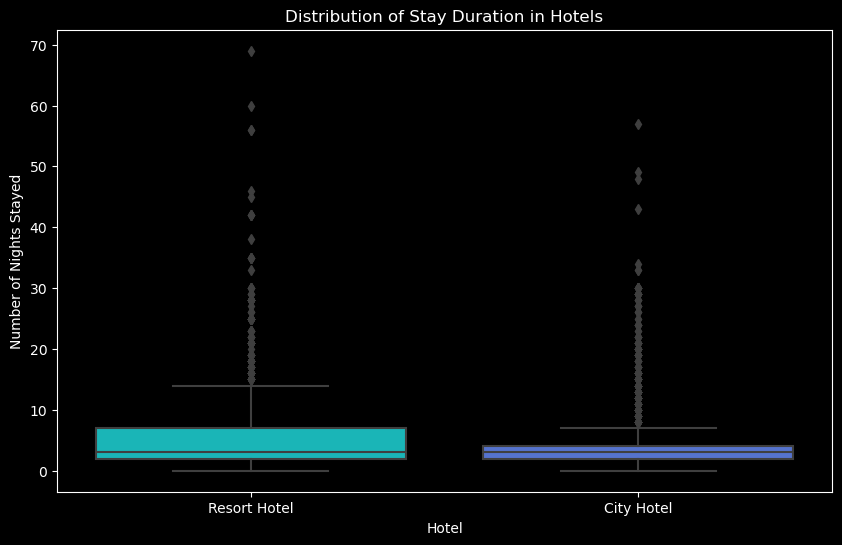

In [12]:
df1['total_nights'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='total_nights', data=df1, palette=['darkturquoise', 'royalblue'])
plt.title('Distribution of Stay Duration in Hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Nights Stayed')
plt.show()

########## or #############
# plt.figure(figsize=(12, 8))


# fig = px.box(df1, x='hotel', y='total_nights', color='hotel', template='plotly_dark', width=600, height=400)

# # Update layout
# fig.update_layout(title='Distribution of Stay Duration in Hotels',
#                   xaxis_title='Hotel',
#                   yaxis_title='Number of Nights Stayed',
#                   yaxis=dict(gridcolor='gray'),  # Add grid lines
#                   boxmode='group',  # Group boxes by color
#                   showlegend=False)  # Hide legend (duplicated)

# # Show plot
# fig.show()

**Inference:**

* Guests tend to stay longer at the resort hotel compared to the city hotel.
* Both hotels have outliers, suggesting some guests stay for exceptionally long durations.
* Resort hotel attracts guests preferring extended stays.

<a id="5"></a>
# 5: Data Preprocessing

<a id="5.1"></a>
## 5.1 : Feature Selection and Engineering
In the `Feature Selection and Engineering` step, we prepare the dataset for modeling by performing several crucial activities:

* **Removing Directly Related Features:** We remove features that are directly related to the target variable to prevent data leakage and ensure a fair evaluation of the model.
* **Dropping Irrelevant Features:** Next, we drop irrelevant features that do not provide any useful information for predicting the target variable.
* **Engineering and Dropping High-Cardinality Features:** We engineer some high-cardinality features to extract relevant information and then drop all high-cardinality features, including the ones from which we extracted information.<br><br>
These activities help in reducing the dimensionality of the dataset, preventing data leakage, and creating new features that may provide additional information for the model.

In [13]:
# Reload the dataset to retain the original data types of the variables
df = pd.read_csv('hotel.csv')

<a id="5.1.1"></a>
### 5.1.1: Remove Directly Related Features
Features like `reservation_status`, `reservation_status_date`, and `assigned_room_type` are directly related to the target variable `is_canceled`. Including them in the model would introduce **data leakage**, compromising the model's ability to make genuine predictions. To build a predictive model that can accurately forecast cancellations, it is essential to remove these features to prevent the model from inadvertently learning patterns based on information that would not be available at the time of prediction. Therefore, excluding these features is crucial to ensure the model's predictive performance and integrity.


### reservation_status:
`reservation_status `is a categorical feature that indicates the current status of a reservation. It can have values like **'Canceled'**, **'Check-Out'**, and **'No-Show'**.

In [14]:
df.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

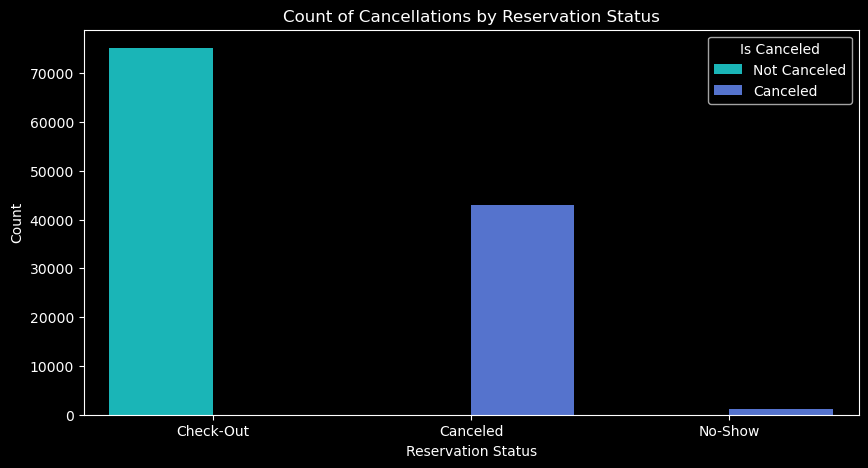

In [15]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue=df['is_canceled'].astype(str), data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

**Inference:**<br>
It is clear from the plot that all the bookings with a reservation_status of "**Canceled**" or "**No-Show**" are indeed canceled (**is_canceled= 1**), and all the bookings with a reservation_status of "**Check-Out**" are not canceled (**is_canceled = 0**).<br>

This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause **data leakage**. Therefore, it is essential to remove the reservation_status feature before training the model.

In [16]:
# Drop the `reservation_status` feature
df = df.drop(['reservation_status'], axis=1)

### reservation_status_date:
`reservation_status_date `is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

* If a booking was canceled, the reservation_status_date would be the date on which the booking was canceled, implying that is_canceled should be 1.
* On the other hand, if a booking was not canceled, the reservation_status_date would reflect the date of check-out, implying that is_canceled should be 0.<br><br>
Therefore, the reservation_status_date can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

In [17]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))

# Calculate the difference between arrival date and reservation status date
df['days_until_arrival'] = (df['reservation_status_date'] - df['arrival_date']).dt.days


df[['reservation_status_date','arrival_date','days_until_arrival','is_canceled']].head(20)

,reservation_status_date,arrival_date,days_until_arrival,is_canceled
0,2015-07-01,2015-07-01,0,0
1,2015-07-01,2015-07-01,0,0
2,2015-07-02,2015-07-01,1,0
3,2015-07-02,2015-07-01,1,0
4,2015-07-03,2015-07-01,2,0
5,2015-07-03,2015-07-01,2,0
6,2015-07-03,2015-07-01,2,0
7,2015-07-03,2015-07-01,2,0
8,2015-05-06,2015-07-01,-56,1
9,2015-04-22,2015-07-01,-70,1


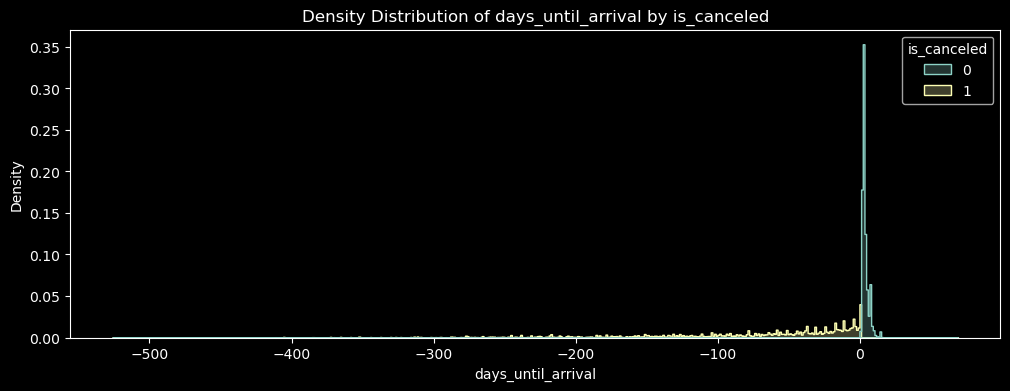

In [18]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="days_until_arrival", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of days_until_arrival by is_canceled')
plt.show()

**Inference:**
The `days_until_arrival` feature represents the number of days between the arrival date and the date at which the reservation status was last updated.<br>

* **Positive values** indicate that the reservation status was updated after the arrival date. Since is_canceled is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to 'Check-Out') after the guest arrived.
* **Negative values** indicate that the reservation status was updated before the arrival date. Since is_canceled is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.<br><br>

This shows a clear relationship between the `days_until_arrival` and the `is_canceled` feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.<br><br>

Therefore, it is advisable to omit both the reservation_status_date and the days_until_arrival features from the model. The latter was derived from the former, and both lead to data leakage, which could result in a model that does not generalize well to new data:

In [19]:
df = df.drop(['reservation_status_date', 'days_until_arrival'], axis=1)

### assigned_room_type
The assigned_room_type feature represents the type of room assigned to the guest. It is assigned after the booking is made, so it cannot be used to predict cancellations. Therefore, assigned_room_type is considered as an irrelevant feature and should be omitted

In [20]:
df = df.drop(['assigned_room_type'], axis=1)

<a id="5.1.2"></a>
### 5.1.2:  Drop Irrelevant Features

* The `arrival_date_year` feature only includes a few years, and if we want to build a model that generalizes well to future data, it is advisable not to include features that could bias the model towards specific years. Therefore, it is reasonable to consider arrival_date_year as an irrelevant feature and it should be omitted.
* The `arrival_date` feature is a composite of `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`. Since it duplicates existing information and contributes to increased feature dimensionality, it is preferable to remove it.

In [21]:
df = df.drop(['arrival_date_year','arrival_date'], axis=1)

<a id="5.1.3"></a>
### 5.1.3: Engineer and Drop High-Cardinality Features

In [22]:
high_cardinality_features = ['country', 'agent', 'company']
unique_categories = df[high_cardinality_features].nunique()
missing_values = df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})

high_cardinality_df

,Unique_Categories,Missing_Values
country,177,488
agent,333,16340
company,352,112593


**inference**:<br>
* For **country**, we'll omit this feature due to the large number of categories. If necessary, we could group countries into regions or retain only the most frequent ones and group the rest as 'Other'.

* For **agent**, we'll omit this feature as well. While we could create a new feature indicating the number of bookings made by each agent, this might not be meaningful for predicting cancellations.

* Regarding **company**, we'll drop this feature due to a high percentage of missing values and its limited usefulness in predicting cancellations.

In [23]:
df = df.drop(['country', 'agent', 'company'], axis=1)

<a id="5.2"></a>
## 5.2: Handle Missing Values

In [24]:
# Calculate the missing values percentage in the original dataset
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage[missing_values_percentage > 0]

children    0.00335
dtype: float64

In [25]:
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

**Inference:**<br>
The children feature has a very low percentage of missing values (0.003350%) and is a numerical feature. Given the distribution of values in the children column, the majority of bookings have 0 children, which is a strong mode. Therefore, it would be reasonable to impute the missing values with 0 (the mode of the column). This approach is simple and will not introduce significant bias

In [26]:
# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column
df['children'].isnull().sum()

0

<a id="5.3"></a>
## 5.3: Handle Noisy Data

In [27]:
# Analyze noisy data
noisy_data = {
    'adr':      df[df['adr'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies':   df[df['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

**Inference:**<br>
We have identified some noisy data in the following features:

* **adr:** There is **1** booking with a negative Average Daily Rate (ADR), which doesn't make sense and indicates a potential error or special case.
* **adults:** There are **403** bookings with 0 adults, which could be a data entry error unless there are legitimate cases where only children or babies book a room.
* **children:** There is **1** booking with 10 children, which seems unusually high for a single booking and could be a potential outlier or data entry error.
* **babies:** There is **1** booking with 10 babies, which seems unusually high for a single booking and could be a potential outlier or data entry error.

In [28]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

# Remove rows with 0 adults
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

In [29]:
## storing cleaned data
df.to_csv('Cleaned hotel.csv')

<a id="5.4"></a>
## 5.4: Feature Scaling and Encoding

In [30]:
categorical_cols = [
    'hotel',
    'is_canceled',
    'arrival_date_month',
    'meal',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'deposit_type',
    'customer_type',
]

In [31]:
# Convert these columns to string (object) data type
for column in categorical_cols:
    if column in df.columns:
        df[column] = df[column].astype(str)

# Verify the changes in data types
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [32]:
num_cols =  df._get_numeric_data().columns
num_cols

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

<a id="5.4.1"></a>
## 5.4.1: Numerical columns scaling

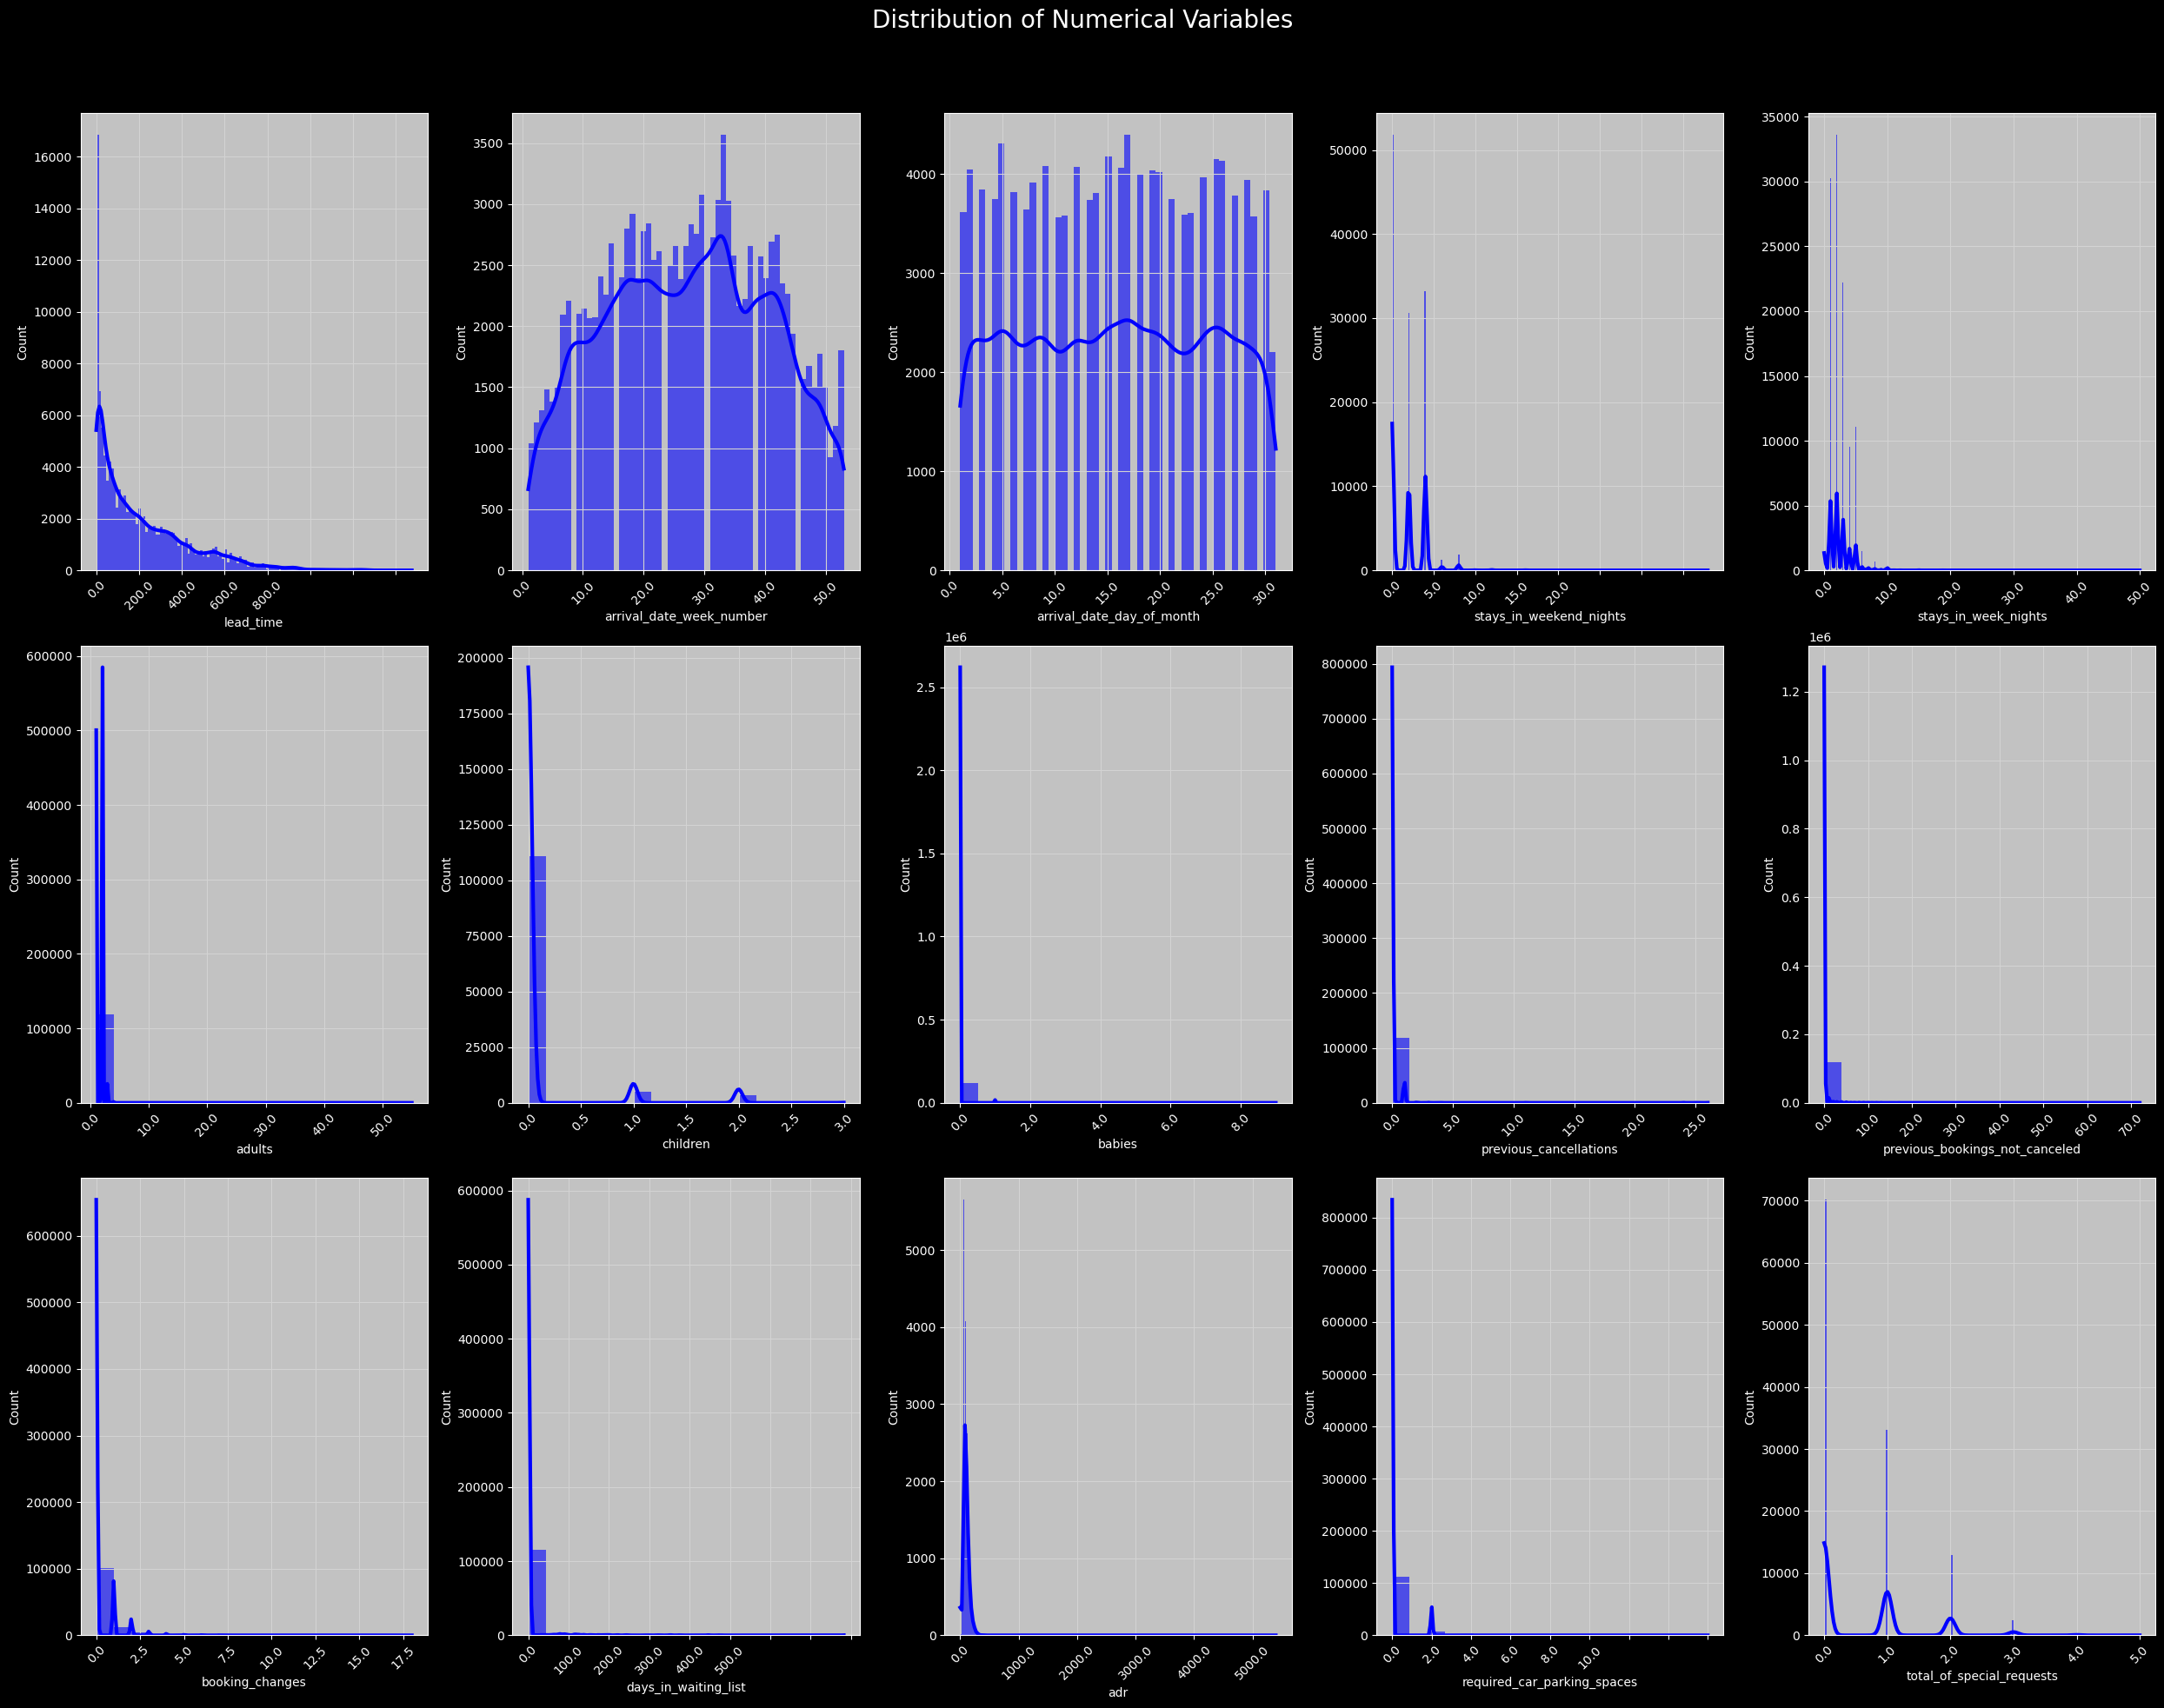

In [33]:
# Set up the subplot
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(num_cols):
    if i < 15:  # Ensure we don't exceed the number of subplots
        x = i // 5
        y = i % 5

        graph = sns.histplot(data=df, x=col, kde=True, ax=ax[x, y],
                             edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})

        ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
        ax[x, y].grid(color='lightgrey')

        ax[x, y].set_facecolor('#c2c2c2')  

# Add title and adjust layout
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [34]:
import sklearn
print(sklearn.__version__)

1.2.2


In [37]:
##Note: the power_transform works well for sklearn as "1.2.2"
from sklearn.preprocessing import power_transform

min_val = df[num_cols].min().min()
epsilon = 1e-6  # Small value to avoid zeros
df[num_cols] = df[num_cols] - min_val + epsilon

df[num_cols] = power_transform(df[num_cols], method='box-cox')

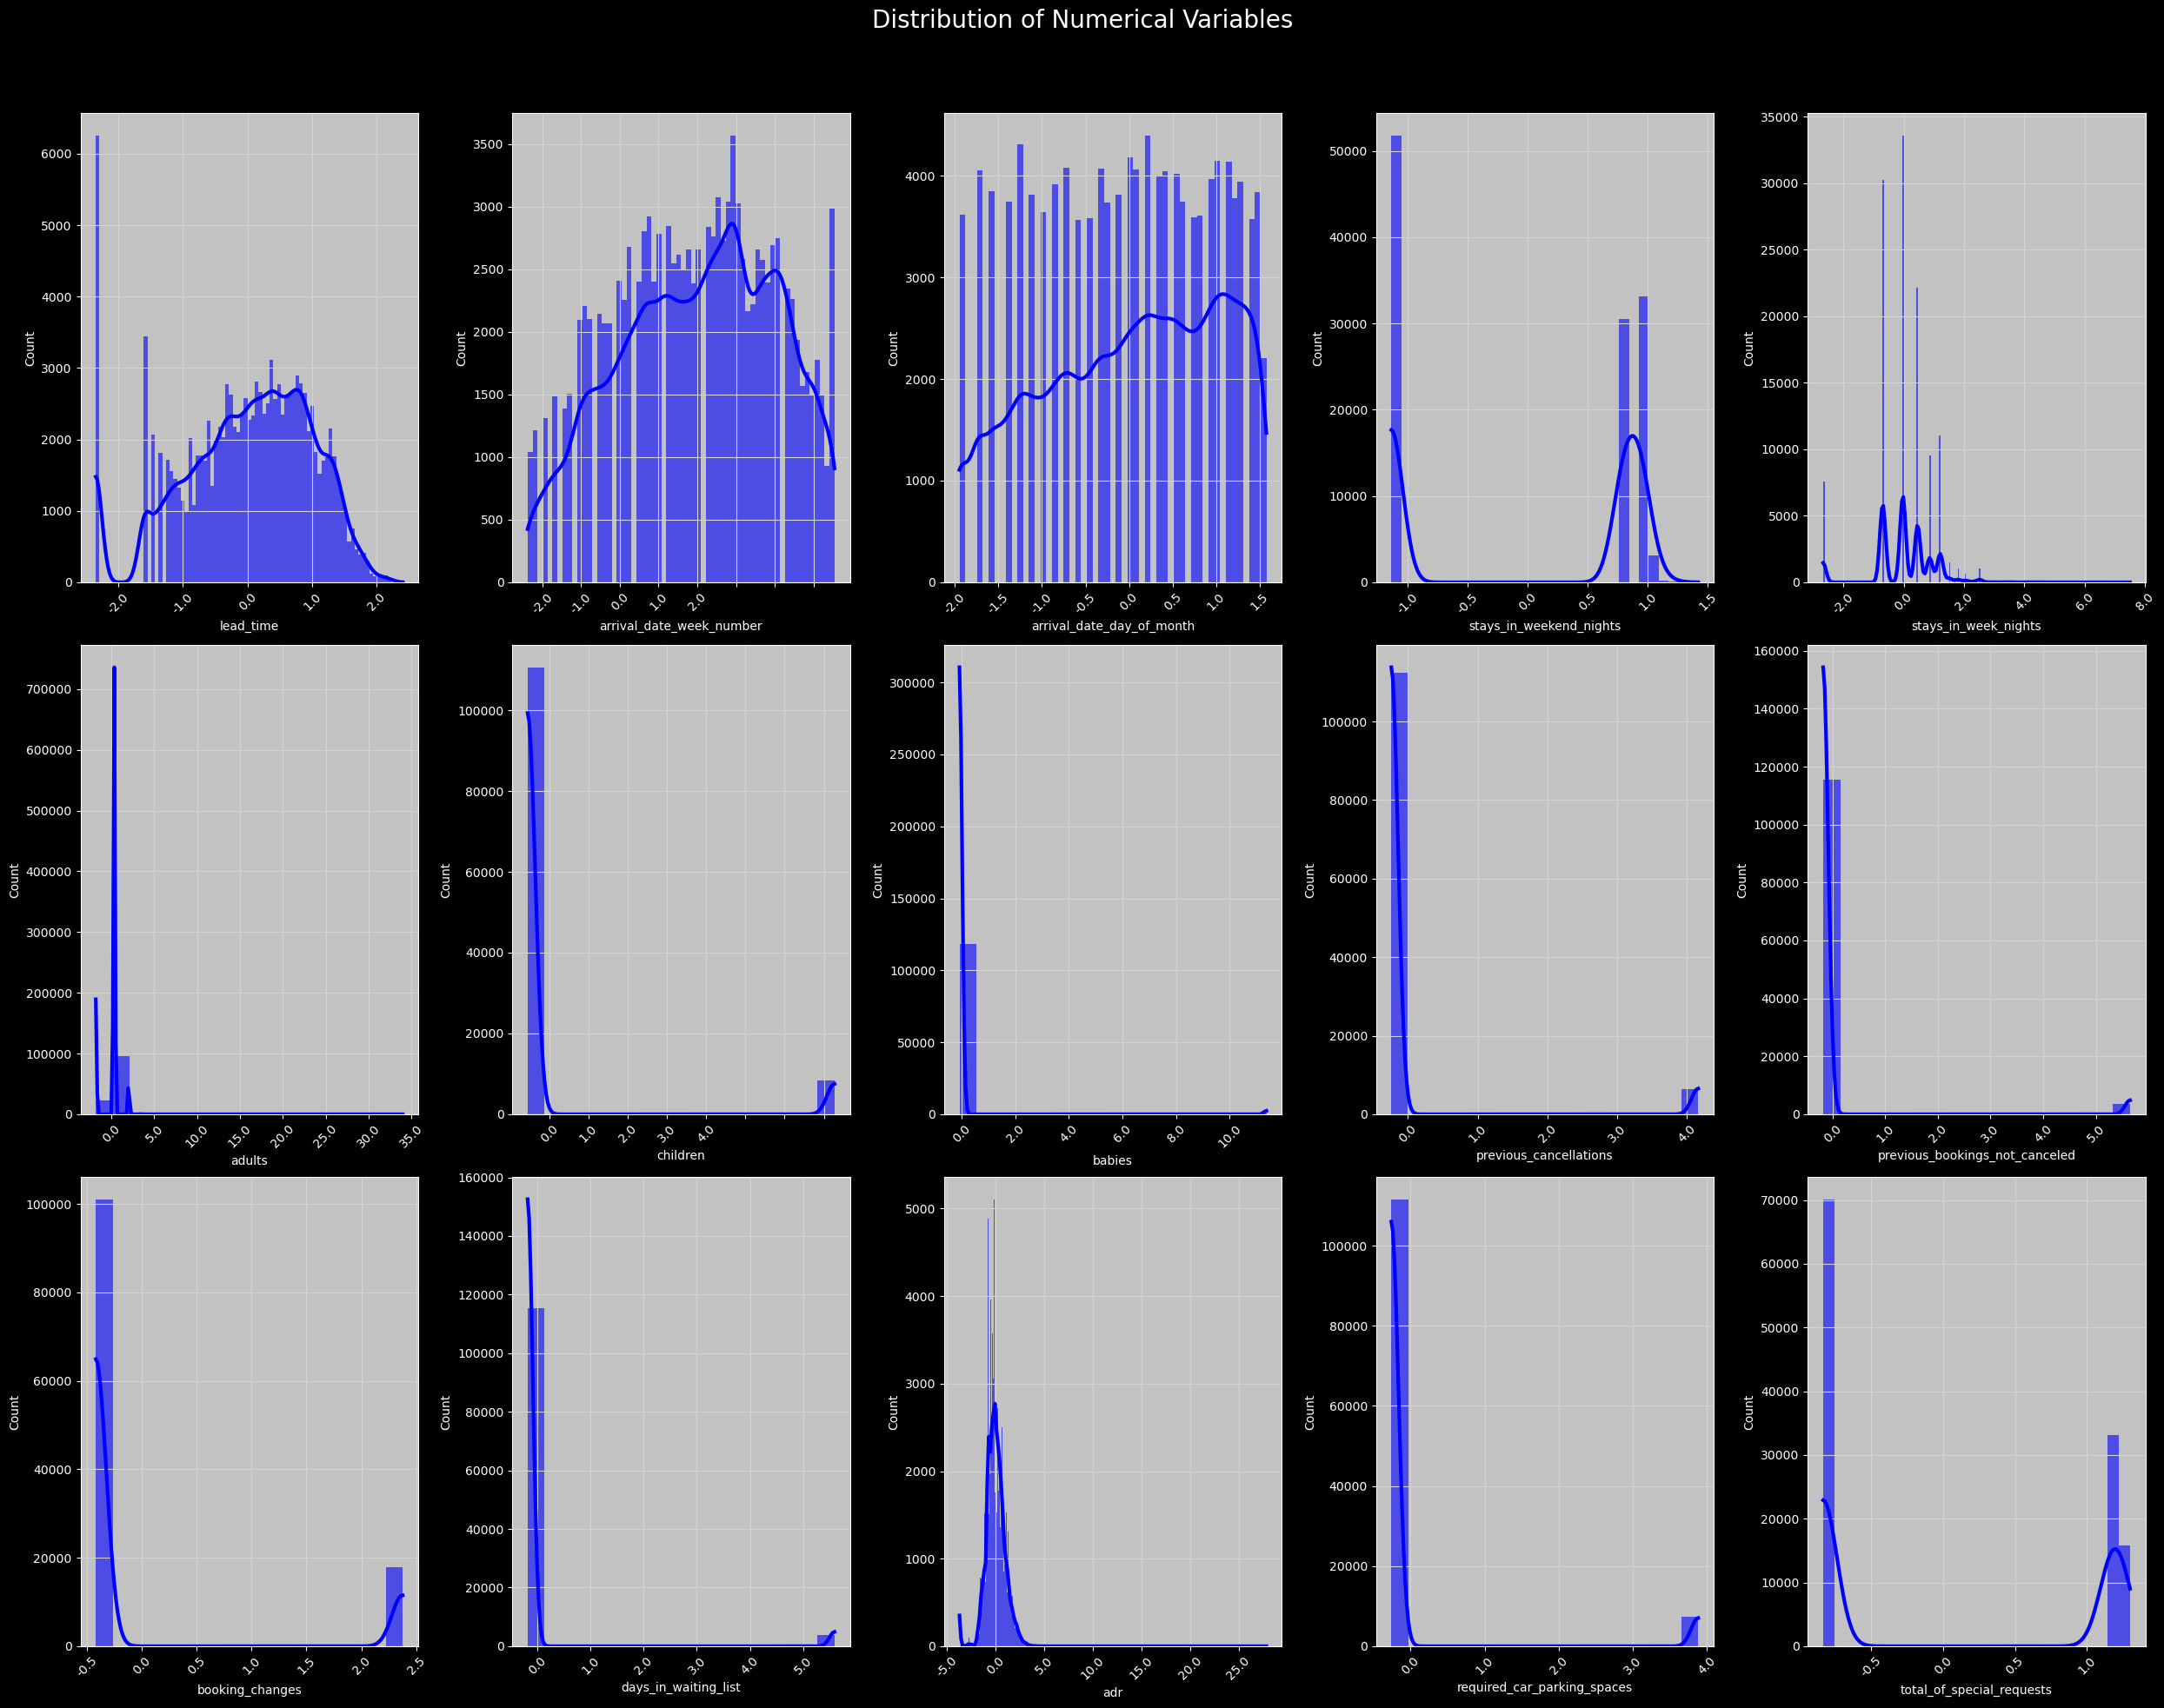

In [38]:
# Set up the subplot
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(num_cols):
    x = i // 5
    y = i % 5
    
    graph = sns.histplot(data=df, x=col, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})

    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    ax[x, y].set_facecolor('#c2c2c2')  
    
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<a id="5.4.1.1"></a>
### 5.4.1.1: Scaling Numeric features to same scale

In [39]:
def ab_scaler(x, a, b, max_x, min_x):
    """
    This function performs scaling or normalization on a given input value 'x' 
    using the linear transformation method with custom scaling parameters 'a' and 'b'. 
    The scaling is applied based on the minimum and maximum values of the input data range.
    
    Parameters:
    - x: The input value to be scaled.
    - a: The lower bound of the desired output range.
    - b: The upper bound of the desired output range.
    - max_x: The maximum value in the original data range.
    - min_x: The minimum value in the original data range.
    
    Returns:
    - scaled_value: The scaled value of 'x' within the specified range [a, b].
    """
    scaled_value = a + ((x - min_x) * (b - a)) / (max_x - min_x)
    return scaled_value

In [40]:
for column in num_cols:
    max = df[column].max()
    min = df[column].min()
    new_col = str(column + "_scaled")
    df[new_col] = df[column].apply(lambda x : ab_scaler(x=x, a=-1, b=1, max_x=max, min_x=min))  

In [41]:
numeric_features = df.filter(regex='_scaled', axis=1).reset_index(drop = True)

In [42]:
numeric_features.head()

,lead_time_scaled,arrival_date_week_number_scaled,arrival_date_day_of_month_scaled,stays_in_weekend_nights_scaled,stays_in_week_nights_scaled,adults_scaled,children_scaled,babies_scaled,previous_cancellations_scaled,previous_bookings_not_canceled_scaled,booking_changes_scaled,days_in_waiting_list_scaled,adr_scaled,required_car_parking_spaces_scaled,total_of_special_requests_scaled
0,0.616556,0.127918,-1.0,-1.0,-1.000000,-0.879705,-1.0,-1.0,-1.0,-1.0,0.998936,-1.0,-1.000000,-1.0,-1.000000
1,1.000000,0.127918,-1.0,-1.0,-1.000000,-0.879705,-1.0,-1.0,-1.0,-1.0,0.999172,-1.0,-1.000000,-1.0,-1.000000
2,-0.452334,0.127918,-1.0,-1.0,-0.611590,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.794591,-1.0,-1.000000
3,-0.348910,0.127918,-1.0,-1.0,-0.611590,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.794591,-1.0,-1.000000
4,-0.335302,0.127918,-1.0,-1.0,-0.480547,-0.879705,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.763168,-1.0,0.885274


In [43]:
df.drop(columns=num_cols, inplace=True)

In [44]:
df.head()

,hotel,is_canceled,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,lead_time_scaled,arrival_date_week_number_scaled,arrival_date_day_of_month_scaled,stays_in_weekend_nights_scaled,stays_in_week_nights_scaled,adults_scaled,children_scaled,babies_scaled,previous_cancellations_scaled,previous_bookings_not_canceled_scaled,booking_changes_scaled,days_in_waiting_list_scaled,adr_scaled,required_car_parking_spaces_scaled,total_of_special_requests_scaled
0,Resort Hotel,0,July,BB,Direct,Direct,0,C,No Deposit,Transient,0.616556,0.127918,-1.0,-1.0,-1.000000,-0.879705,-1.0,-1.0,-1.0,-1.0,0.998936,-1.0,-1.000000,-1.0,-1.000000
1,Resort Hotel,0,July,BB,Direct,Direct,0,C,No Deposit,Transient,1.000000,0.127918,-1.0,-1.0,-1.000000,-0.879705,-1.0,-1.0,-1.0,-1.0,0.999172,-1.0,-1.000000,-1.0,-1.000000
2,Resort Hotel,0,July,BB,Direct,Direct,0,A,No Deposit,Transient,-0.452334,0.127918,-1.0,-1.0,-0.611590,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.794591,-1.0,-1.000000
3,Resort Hotel,0,July,BB,Corporate,Corporate,0,A,No Deposit,Transient,-0.348910,0.127918,-1.0,-1.0,-0.611590,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.794591,-1.0,-1.000000
4,Resort Hotel,0,July,BB,Online TA,TA/TO,0,A,No Deposit,Transient,-0.335302,0.127918,-1.0,-1.0,-0.480547,-0.879705,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.763168,-1.0,0.885274


<a id="5.4.2"></a>
## 5.4.2: Categorical columns Encoding

In [45]:
for column in categorical_cols:
    print(df[column].value_counts(),'\n')

hotel
City Hotel      78939
Resort Hotel    40046
Name: count, dtype: int64 

is_canceled
0    74871
1    44114
Name: count, dtype: int64 

arrival_date_month
August       13829
July         12610
May          11764
October      11131
April        11057
June         10917
September    10489
March         9751
February      8034
November      6765
December      6736
January       5902
Name: count, dtype: int64 

meal
BB           92018
HB           14454
SC           10546
Undefined     1169
FB             798
Name: count, dtype: int64 

market_segment
Online TA        56220
Offline TA/TO    24178
Groups           19791
Direct           12553
Corporate         5282
Complementary      724
Aviation           235
Undefined            2
Name: count, dtype: int64 

distribution_channel
TA/TO        97558
Direct       14578
Corporate     6651
GDS            193
Undefined        5
Name: count, dtype: int64 

is_repeated_guest
0    115231
1      3754
Name: count, dtype: int64 

reserved_room_ty

**One-hot Encoding Decision:**
Based on the feature descriptions, let's decide on one-hot encoding:

* **Nominal Variables:** These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model.

* **Ordinal Variables:** These variables have an inherent order. They don't necessarily need to be one-hot encoded since their order can provide meaningful information to the model.

**Given the above explanation:**
The following features are nominal variables and should be one-hot encoded:

* **hotel:** This is a nominal variable with two categories.
* **meal:** This is a nominal variable.
* **market_segment:** This is a nominal variable.
* **distribution_channel:** This is a nominal variable.
* **reserved_room_type:** This is a nominal variable.
* **deposit_type:** This is a nominal variable.
* **customer_type:** This is a nominal variable.

The following feature is an ordinal variable and should be label encoded:

**arrival_date_month:** This is an ordinal variable (months have a natural order).

In [46]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 47 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   is_canceled                            118985 non-null  object 
 1   arrival_date_month                     118985 non-null  int64  
 2   is_repeated_guest                      118985 non-null  object 
 3   lead_time_scaled                       118985 non-null  float64
 4   arrival_date_week_number_scaled        118985 non-null  float64
 5   arrival_date_day_of_month_scaled       118985 non-null  float64
 6   stays_in_weekend_nights_scaled         118985 non-null  float64
 7   stays_in_week_nights_scaled            118985 non-null  float64
 8   adults_scaled                          118985 non-null  float64
 9   children_scaled                        118985 non-null  float64
 10  babies_scaled                          118985 non-null  

In [47]:
df.head()

,is_canceled,arrival_date_month,is_repeated_guest,lead_time_scaled,arrival_date_week_number_scaled,arrival_date_day_of_month_scaled,stays_in_weekend_nights_scaled,stays_in_week_nights_scaled,adults_scaled,children_scaled,babies_scaled,previous_cancellations_scaled,previous_bookings_not_canceled_scaled,booking_changes_scaled,days_in_waiting_list_scaled,adr_scaled,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,7,0,0.616556,0.127918,-1.0,-1.0,-1.000000,-0.879705,-1.0,-1.0,-1.0,-1.0,0.998936,-1.0,-1.000000,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,0,7,0,1.000000,0.127918,-1.0,-1.0,-1.000000,-0.879705,-1.0,-1.0,-1.0,-1.0,0.999172,-1.0,-1.000000,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,0,7,0,-0.452334,0.127918,-1.0,-1.0,-0.611590,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.794591,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,7,0,-0.348910,0.127918,-1.0,-1.0,-0.611590,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.794591,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,7,0,-0.335302,0.127918,-1.0,-1.0,-0.480547,-0.879705,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.763168,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


<a id="5.5"></a>
## 5.5: Check Imbalanced Data

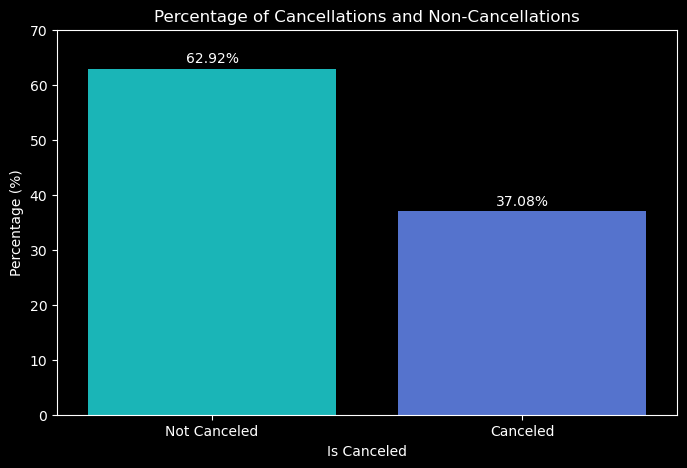

In [48]:
# Calculating the percentage of each class
percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

**Inference:**<br>
The bar plot shows that **37.08%** of bookings were **canceled**, while **62.92%** **not canceled**. Although there's some class imbalance, it's not severe. Resampling techniques may not be needed, but it's wise to evaluate different approaches for optimal results.